In [1]:
import sys
print(sys.path)

['C:\\Users\\Alex\\Documents\\Master_in_Computer_Science\\2nd_term\\Machine learning in Python', 'C:\\Users\\Alex\\FinalAnaconda\\python37.zip', 'C:\\Users\\Alex\\FinalAnaconda\\DLLs', 'C:\\Users\\Alex\\FinalAnaconda\\lib', 'C:\\Users\\Alex\\FinalAnaconda', '', 'C:\\Users\\Alex\\FinalAnaconda\\lib\\site-packages', 'C:\\Users\\Alex\\FinalAnaconda\\lib\\site-packages\\win32', 'C:\\Users\\Alex\\FinalAnaconda\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Alex\\FinalAnaconda\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Alex\\FinalAnaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Alex\\.ipython']


## Import of libraries

We import the relevant libraries of Python that we are going to use for performing clustering on our dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading our database

Next thing to do is read our database to get to know our data.

In [3]:
df = pd.read_csv("CC GENERAL.csv", sep=";")
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Getting to know more our data

By performing the info() method we get to know the datatypes of the columns of our dataset and how many null values can be found. Moreover, we also know the number of rows and columns present on our datase, which represent the samples and features, respectively.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

## Filling missing values

As we can see from the describe method on the column that has null values (**MINIMUM_PAYMENTS**), 50% of the data is under the value of **312.344**. Therefore, we thought that the median represented a more relevant value to fill the missing data, since the mean is a value over the **75%** percentile, which is clearly inlfuenced by outliers such as the maximum value **76406.207520**. The same applies to the (**CREDIT_LIMIT**) column.

In [5]:
df["MINIMUM_PAYMENTS"].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [6]:
df["CREDIT_LIMIT"].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [7]:
x = df.fillna(df.median())
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

## Dropping columns

In this step, what we are doing is dropping the column **CUST_ID** to perform the elbow plot on the rest of the columns that are going to influence the clustering of the bank customers.

In [8]:
x = x.drop("CUST_ID", axis = 1)
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Elbow plot

We are going to use an elbow plot to decide how many clusters to choose from the data. In this case, the optimal value would be where the value of inertia starts to decrease more slowly.

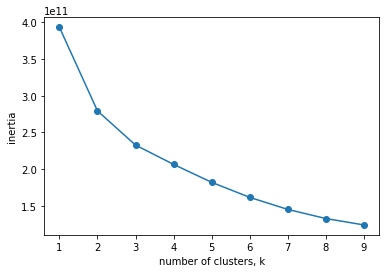

In [9]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

As we can see from the graph above, the optimal number of cluster in this case would be around 4 or 5. In this example, we are going to perform the Kmeans clustering using 4 clusters.

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create KMeans instance: kmeans
model = KMeans(n_clusters = 4)

labels = model.fit_predict(x)

In this line, we are adding a column to the dataframe x called labels with the labels calculated using the kmeans clustering.

In [11]:
x["labels"] = labels
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT           

Here we analyze the variance of each of the columns in order to know which ones have the biggest one, and therefore are going to influence the most our clustering. As we can see, the columns BALANCE, PURCHASES, CREDIT_LIMIT, PAYMENTS, CASH_ADVANCE are the ones that represent the higher variance, and we are going to also include at the end to classify our customers the PURCHASE_FREQUENCY column, since it will help us to determine how our customers spend their money and how often.

In [13]:
x.var(axis = 0, skipna = True) 

BALANCE                             4.332775e+06
BALANCE_FREQUENCY                   5.612351e-02
PURCHASES                           4.565208e+06
ONEOFF_PURCHASES                    2.755228e+06
INSTALLMENTS_PURCHASES              8.178274e+05
CASH_ADVANCE                        4.398096e+06
PURCHASES_FREQUENCY                 1.610985e-01
ONEOFF_PURCHASES_FREQUENCY          8.900441e-02
PURCHASES_INSTALLMENTS_FREQUENCY    1.579647e-01
CASH_ADVANCE_FREQUENCY              4.004857e-02
CASH_ADVANCE_TRX                    4.657580e+01
PURCHASES_TRX                       6.179027e+02
CREDIT_LIMIT                        1.323975e+07
PAYMENTS                            8.381394e+06
MINIMUM_PAYMENTS                    5.441920e+06
PRC_FULL_PAYMENT                    8.555578e-02
TENURE                              1.791129e+00
labels                              7.770114e-01
dtype: float64

To reduce the difference in variance of the different columns we are going to standardize the data with StandardScaler() which transforms the data in such a form that its distribution will have a mean value of 0 and standard deviation of 1.

In [14]:
y = x.drop("labels", axis = 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(y)
scaled_DataFrame = pd.DataFrame(scaled_data, columns= y.columns)
scaled_DataFrame.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [15]:
# Create KMeans instance: kmeans
scaled_model = KMeans(n_clusters = 4)

labels_scaleddata = model.fit_predict(scaled_DataFrame)


scaled_DataFrame["labels"] = labels_scaleddata
scaled_DataFrame.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,2
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,1


After scaling the data we create a DataFrame with the scaled data and perform Kmeans clustering with 4 clusters to associate different labels to the scaled data. After associating the labels to the scaled data, the column labels will be dropped in order to perform hierarchical clustering on the scaled data, which will allow us to see how the clusters are created at each different level. Since, clusters are made at different levels and at each level, different sets of clusters are created, as it would be seen later in the dendrograms created.

In [16]:
scaled_DataFrame2 = scaled_DataFrame.drop("labels", axis = 1)
scaled_DataFrame2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


## Hierarchical clustering

The algorithm behind hierarchical clustering does the following:

   1. Start assigning each item to its own cluster (if you had N items, you now have N clusters, each containing just one item.
   2. Find the closest(most similar) pair of clusters and merge them into a single cluster, so that you now have one less cluster.
   3. Compute distances(similarities) between the new cluster and each of the old clusters.
   4. Repeat steps 2 and 3 until all items are clustered into a single cluster of size N.
   
Here different dendrograms are going to be shown using different linkage methods:

   * **Ward or minimal increase of sum-of-squares**: two clusters are merged based on their error sum-of-square values(ESS). The two clusters with the lowest ESS are merged. This process repeats until there is one single cluster left.
   * **Complete**: Two clusters with the closest maximum distance are merged. Again, it repeats until there is one single cluster left.
   * **Average**: uses the average pair-wise proximity among all pairs of objects in different clusters. Clusters are merged based on their lowest average distances.
   


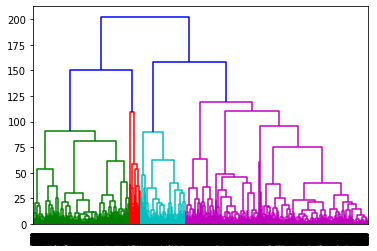

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(scaled_DataFrame2, method = "ward")
dendrogram(mergings)
plt.show()

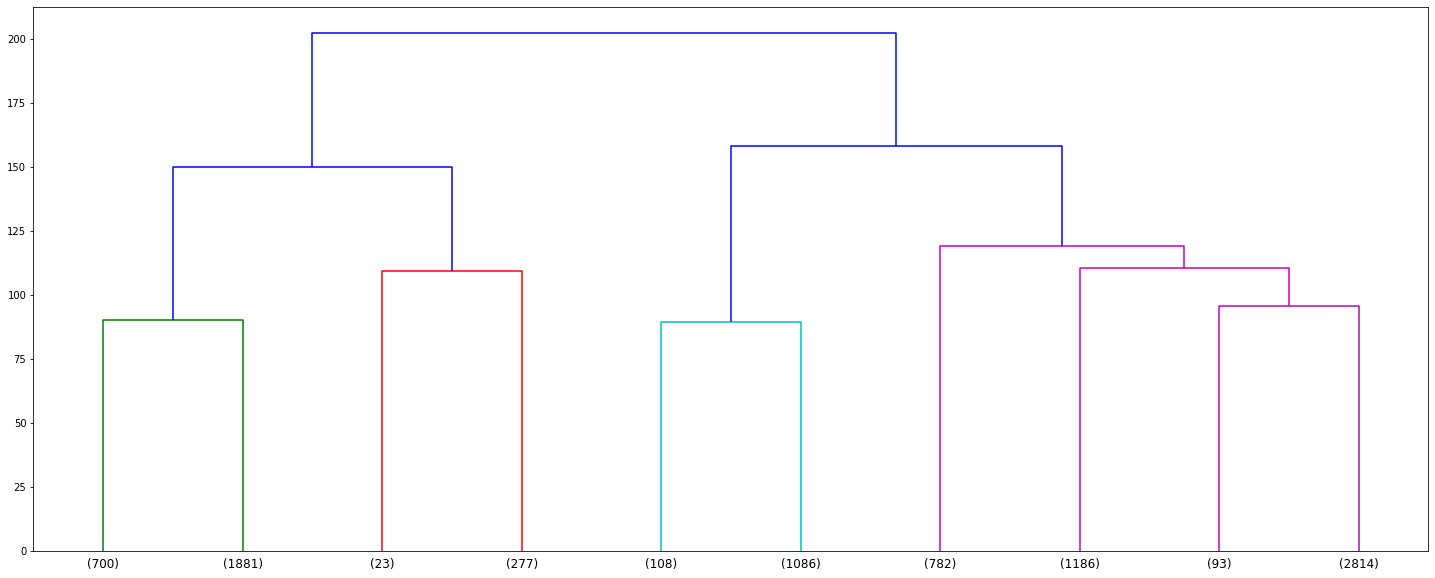

In [18]:
plt.figure(figsize=(25,10))
dend = dendrogram(mergings, p = 10, truncate_mode="lastp") 

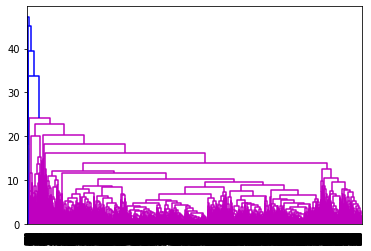

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
merging = linkage(scaled_DataFrame2, method = "complete")
dendrogram(merging)
plt.show()


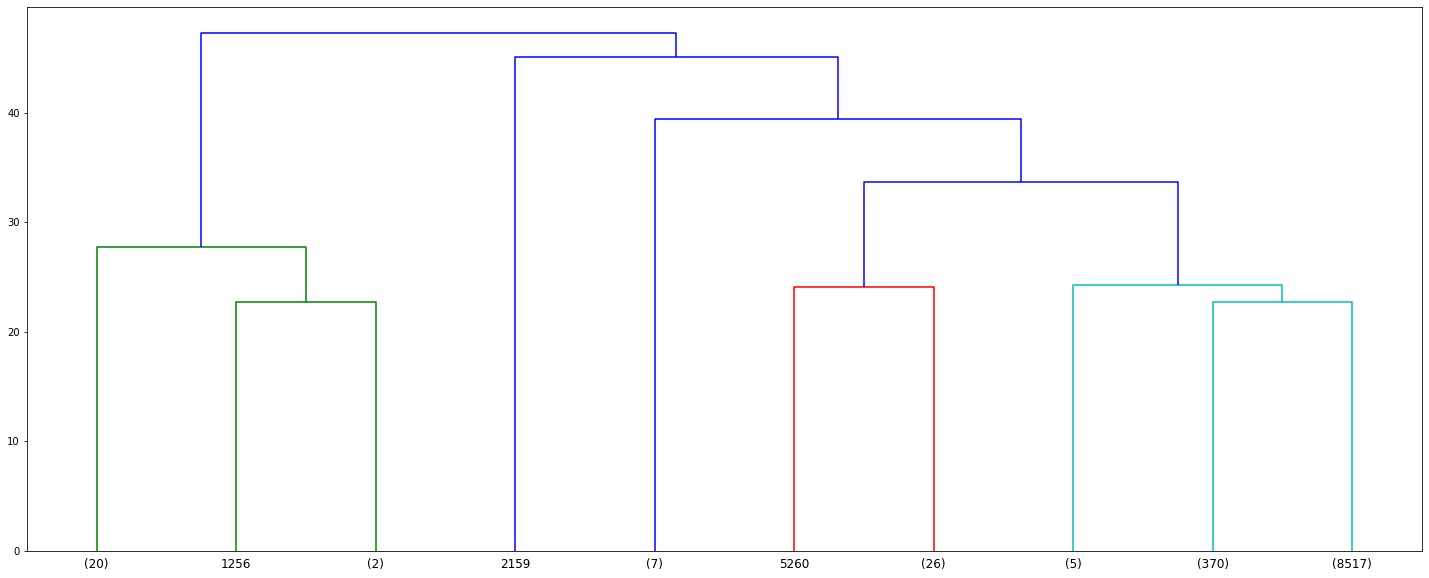

In [20]:
plt.figure(figsize=(25,10))
dend = dendrogram(merging, p = 10, truncate_mode="lastp") 

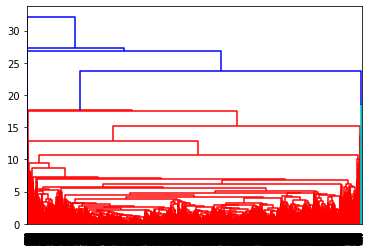

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
merging4 = linkage(scaled_DataFrame2, method = "average")
dendrogram(merging4)
plt.show()

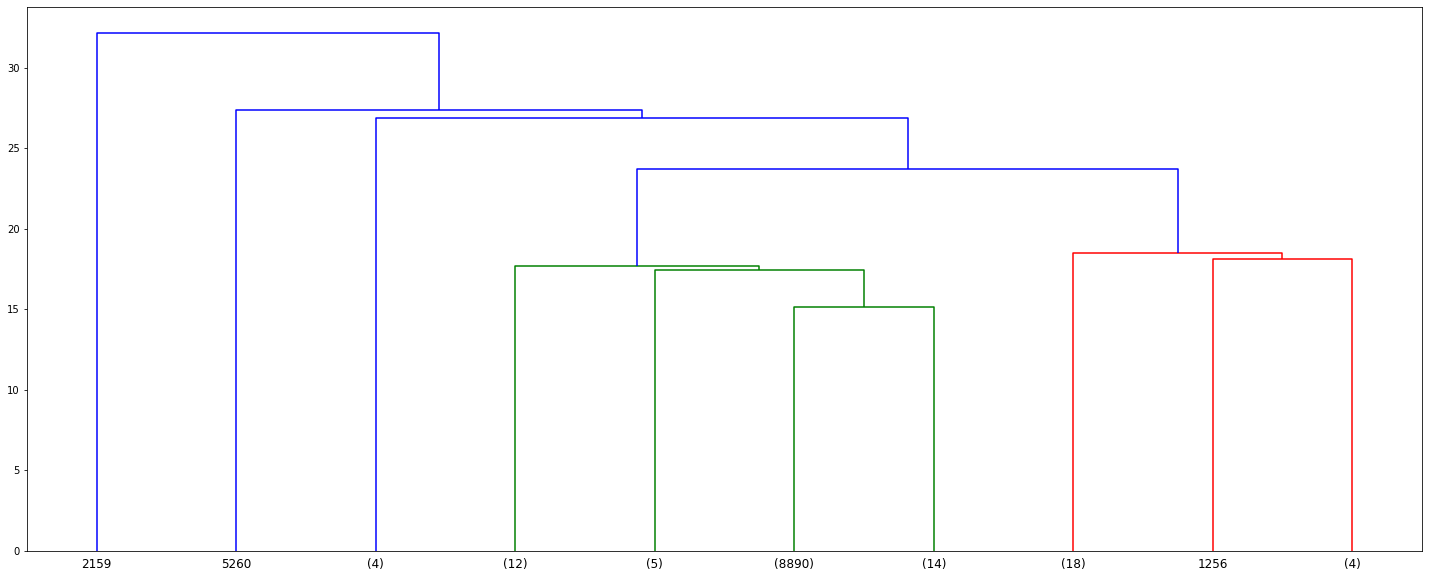

In [22]:
plt.figure(figsize=(25,10))
dend = dendrogram(merging4, p = 10, truncate_mode="lastp") 

As it can be seen from the dendrograms above, the same conclusion as with the KMeans clustering is reached, the data is divided in 4 main clusters. After performing the dendrograms, the columns with the highest variance are going to be selected from the whole scaled DataFrame(PURCHASES, BALANCE, CASH_ADVANCE, PAYMENTS, CREDIT_LIMIT). Moreover, also the PURCHASE_FREQUENCY and labels column are selected, so we can ge to know the consumer behaviour based on each label.

In [23]:
splitted_dataframe = scaled_DataFrame.loc[:, ["PURCHASES", "BALANCE", "CASH_ADVANCE", "PURCHASES_FREQUENCY", "PAYMENTS", "CREDIT_LIMIT", "labels"]]
splitted_dataframe.shape


(8950, 7)

In [24]:
splitted_dataframe["CUST_ID"] = df["CUST_ID"]
splitted_dataframe.head()

,PURCHASES,BALANCE,CASH_ADVANCE,PURCHASES_FREQUENCY,PAYMENTS,CREDIT_LIMIT,labels,CUST_ID
0,-0.424900,-0.731989,-0.466786,-0.806490,-0.528979,-0.960378,1,C10001
1,-0.469552,0.786961,2.605605,-1.221758,0.818642,0.688678,2,C10002
2,-0.107668,0.447135,-0.466786,1.269843,-0.383805,0.826100,0,C10003
3,0.232058,0.049099,-0.368653,-1.014125,-0.598688,0.826100,1,C10004
4,-0.462063,-0.358775,-0.466786,-1.014125,-0.364368,-0.905410,1,C10005


In [25]:
splitted_dataframe1 = splitted_dataframe.groupby('labels').agg({'CUST_ID': 'count',
                                                           'PURCHASES': 'mean',
                                            'PURCHASES_FREQUENCY': 'mean',
                                            'BALANCE': 'mean',
                                            'CASH_ADVANCE': 'mean',
                                            'PAYMENTS': 'mean',
                                            'CREDIT_LIMIT': 'mean'
                                            })
splitted_dataframe1.head()

,CUST_ID,PURCHASES,PURCHASES_FREQUENCY,BALANCE,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT
labels,,,,,,,
0,3367,0.109044,0.983721,-0.321688,-0.366373,-0.138502,-0.077251
1,3977,-0.343158,-0.797825,-0.265116,-0.182333,-0.262145,-0.334110
2,1197,-0.234654,-0.504596,1.459571,1.689346,0.604825,0.838787
3,409,3.125845,1.136338,0.954485,-0.155091,1.919096,1.429914


In [26]:
splitted_dataframe2 = splitted_dataframe.groupby('labels').agg({'CUST_ID': 'count',
                                                           'PURCHASES': 'median',
                                            'PURCHASES_FREQUENCY': 'median',
                                            'BALANCE': 'median',
                                            'CASH_ADVANCE': 'median',
                                            'PAYMENTS': 'median',
                                            'CREDIT_LIMIT': 'median'
                                            })
splitted_dataframe2.head()

,CUST_ID,PURCHASES,PURCHASES_FREQUENCY,BALANCE,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT
labels,,,,,,,
0,3367,-0.051909,1.269843,-0.589601,-0.466786,-0.274398,-0.410693
1,3977,-0.432482,-1.014125,-0.384562,-0.410716,-0.413978,-0.548114
2,1197,-0.429515,-1.014125,1.302005,1.281790,0.079504,0.688678
3,409,2.267873,1.269843,0.445971,-0.466786,1.282875,1.238364


## Final conclusion

   * Cluster - 0 --> People with low level of income that do not purchase big amounts. Frequent purchases.
   * Cluster - 1 --> People with low-medium level of income that do not purchase frequently as well as not big amounts. 
   * Cluster - 2 --> People with high level of income, but low frequency when purchasing. They also do not buy big amounts.
   * Cluster - 3 --> People with medium level of income that purchase big amounts, and high frequency purchasing.
   
The **CUST_ID** column represents the number of customers included in each label **(0,1,2,3)**.